In [101]:
import torch
import torch.nn as nn # NNのネットワークを定義するための関数が用意されている
import torch.optim as optim # オプティマイザ(最適化関数)関係の関数が用意されている
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [102]:
torch.manual_seed(114514)
# 人工的に教師データを生成するための準備、ランダム値を生成する

In [103]:
# 線形グラフを作成
a = 2 # とりあえずの重みを設定
b = 1 # とりあえずの切片を設定

tensor_x = torch.linspace(0, 1, 500) # 0から1までの範囲で500等分

x = tensor_x.view(500, 1)
# バッチサイズ x 入力データの次元
# PyTorchで順伝播を計算するときには、必ず
# 1.バッチの次元 2.入力データの次元 の並びになるように設定する
# 今回は1つの値を入力して1つの値を出力するネットワークモデル
# ここが前処理としての作業

eps = torch.randn(500, 1) # 正規乱数
y = a * x + b + eps

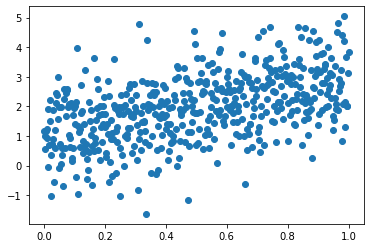

In [104]:
plt.scatter(x, y)

In [105]:
class Nakamura_LR(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        output = self.linear(x)
        return output

In [106]:
model = Nakamura_LR()

## 現時点でのネットワークモデルの性能をチェックする

In [107]:
x_test = torch.tensor([1.0]) 
x_test

tensor([1.])

In [108]:
model(x_test) 

tensor([-0.1941], grad_fn=<AddBackward0>)

In [109]:
x2 = torch.linspace(0, 1, 500).view(500, 1)

In [110]:
x2.size()

torch.Size([500, 1])

In [111]:
y_pred = model(x2)

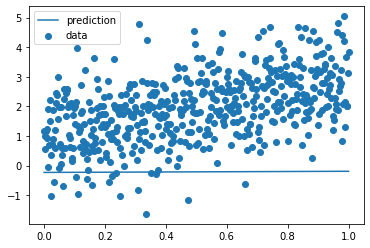

In [112]:
plt.plot(x2, y_pred.detach(), label="prediction")
plt.scatter(x, y, label="data")
plt.legend()

## 損失関数、最適化関数の設定

In [113]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [114]:
losses = []
num_epoch = 1000
for epoch in range(num_epoch):
    optimizer.zero_grad() # 勾配初期化
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print("epoch: {}, loss: {}".format(epoch, loss.item()))
        losses.append(loss.item())

epoch: 0, loss: 6.045029640197754
epoch: 10, loss: 5.79930305480957
epoch: 20, loss: 5.565730094909668
epoch: 30, loss: 5.343709945678711
epoch: 40, loss: 5.132670879364014
epoch: 50, loss: 4.932069778442383
epoch: 60, loss: 4.741390228271484
epoch: 70, loss: 4.5601372718811035
epoch: 80, loss: 4.3878493309021
epoch: 90, loss: 4.224079608917236
epoch: 100, loss: 4.068408012390137
epoch: 110, loss: 3.9204330444335938
epoch: 120, loss: 3.779773473739624
epoch: 130, loss: 3.6460680961608887
epoch: 140, loss: 3.5189712047576904
epoch: 150, loss: 3.3981566429138184
epoch: 160, loss: 3.2833142280578613
epoch: 170, loss: 3.1741461753845215
epoch: 180, loss: 3.070373773574829
epoch: 190, loss: 2.971728563308716
epoch: 200, loss: 2.877957344055176
epoch: 210, loss: 2.788817882537842
epoch: 220, loss: 2.704082489013672
epoch: 230, loss: 2.623532295227051
epoch: 240, loss: 2.54695987701416
epoch: 250, loss: 2.474170446395874
epoch: 260, loss: 2.404972791671753
epoch: 270, loss: 2.3391928672790527

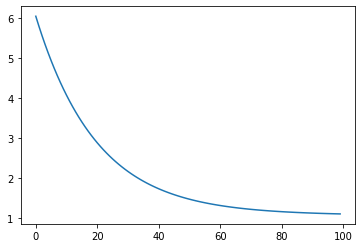

In [115]:
plt.plot(losses)

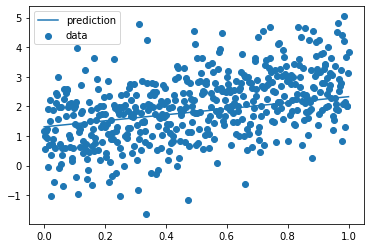

In [116]:
x_test = torch.linspace(0, 1, 500).view(500, 1)
y_test = model(x_test)
plt.plot(x_test, y_test.detach(), label="prediction")
plt.scatter(x, y, label="data")
plt.legend()